In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ray tracing
from OceanRays.SoundSpeed import CTDSoundSpeed
from OceanRays.RayPaths import RayTrace,plotProfileRaypaths

# for reading seabird .cnv files
from seabird.cnv import fCNV

# read local CTD data in csv format
from OceanRays.SoundSpeed import readSSP 


/Users/an77/anaconda3/envs/oceanrays/lib/python3.13/site-packages/seabird/cnv.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
 # Sound Speed from CTD Data 
infile='../CTD_examples/SKQ202409S_009avg.cnv'

profile = fCNV(infile) 
CMac = CTDSoundSpeed(profile,model='Mackenzie')

# Alternatively, read from previously saved CSV file
depth, c ,header = readSSP('../CTD_examples/SKQ202409S_009avg_SSP_Mackenzie.csv')


In [3]:
# Set parameters for ray tracing, including the source location, the maximum range and a series of take-off angles
initial_depth = 6000  # meters (source/transponder depth). This will also be the 
max_range = 50e3    # meters (furthest past it'll calculate--needed as results in SOFAR channel can be infinite)
angles = [-80, -65, -50, -35] # take-off angles from source (negative is going upward)

Calculating travel times to the surface...
  Angle: -80° -> Reached surface at 1022.52 m. Travel Time: 4.03355 seconds.
  Angle: -65° -> Reached surface at 2688.65 m. Travel Time: 4.35745 seconds.
  Angle: -50° -> Reached surface at 4771.26 m. Travel Time: 5.08052 seconds.
  Angle: -35° -> Reached surface at 7809.69 m. Travel Time: 6.52647 seconds.


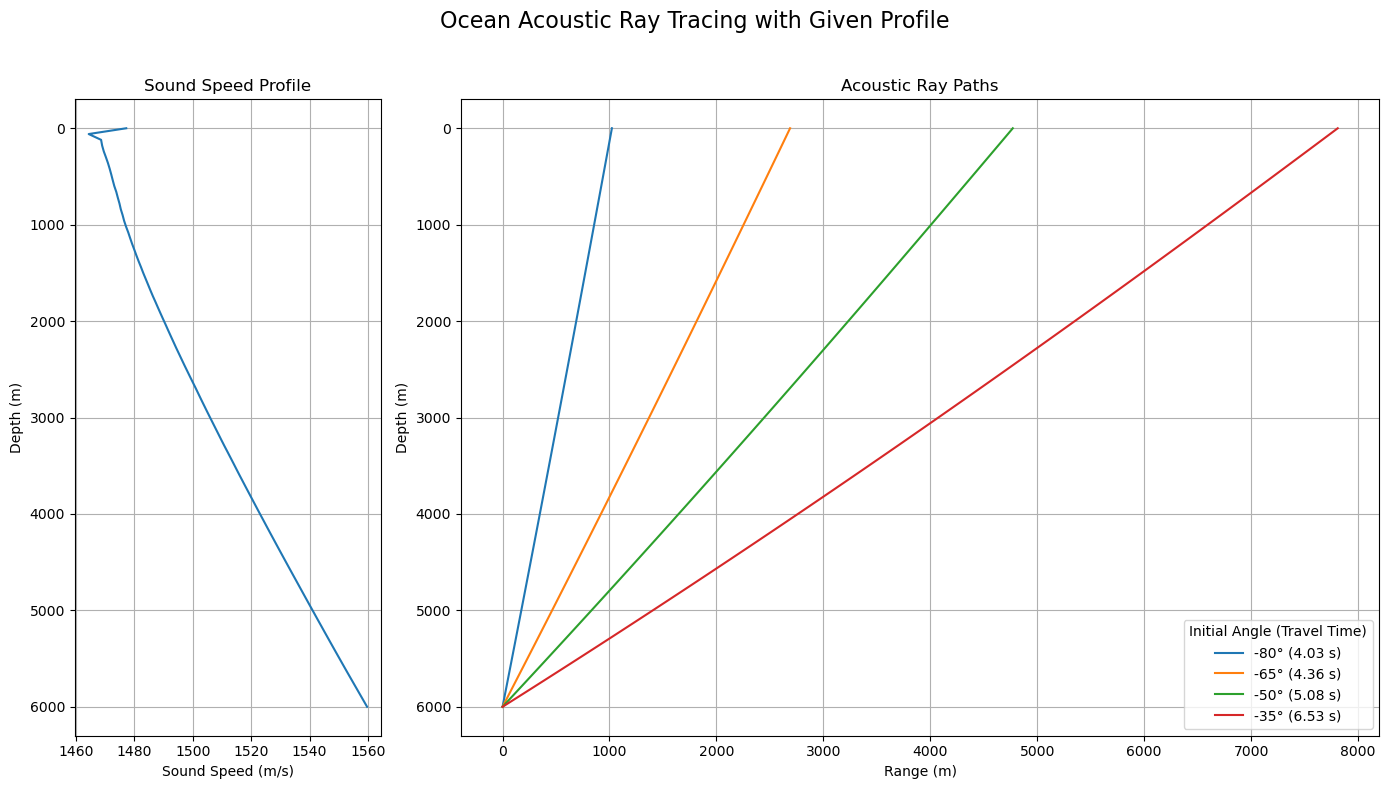

In [4]:
# Run using the Sound Speed calculated from the CTD profile read in above
# --- Run Ray Path Calcs ---
ray_paths = {}
print("Calculating travel times to the surface...")
for angle in angles:
    # If zProfile and cProfile are provided, use then, otherwise use Munk model
    ranges, depths, travel_time = RayTrace(angle, max_range, initial_depth,zProfile=profile['DEPTH'],cProfile=CMac)
    ray_paths[angle] = ((ranges, depths), travel_time)
    if travel_time is not None:
        surface_range = ranges[-1]
        print(f"  Angle: {angle:}° -> Reached surface at {surface_range:.2f} m. Travel Time: {travel_time:.5f} seconds.")
    else:
        print(f"  Angle: {angle:}° -> Did not reach the surface within {max_range} km.")

# --- Plotting ---
depth_grid = np.linspace(0, initial_depth, 101)  # linearly spaced points across depth for plotting sound speed profile
plotProfileRaypaths(ray_paths, zProfile=profile['DEPTH'],cProfile=CMac, sspDepths=depth_grid) # again use CTD profiles

Calculating travel times to the surface...
  Angle: -15° -> Reached surface at 5865.83 m. Travel Time: 3.99460 seconds.
  Angle: -10° -> Reached surface at 293451.81 m. Travel Time: 195.18863 seconds.
  Angle: 10° -> Reached surface at 342681.33 m. Travel Time: 227.88425 seconds.
  Angle: 15° -> Reached surface at 71598.88 m. Travel Time: 47.41874 seconds.


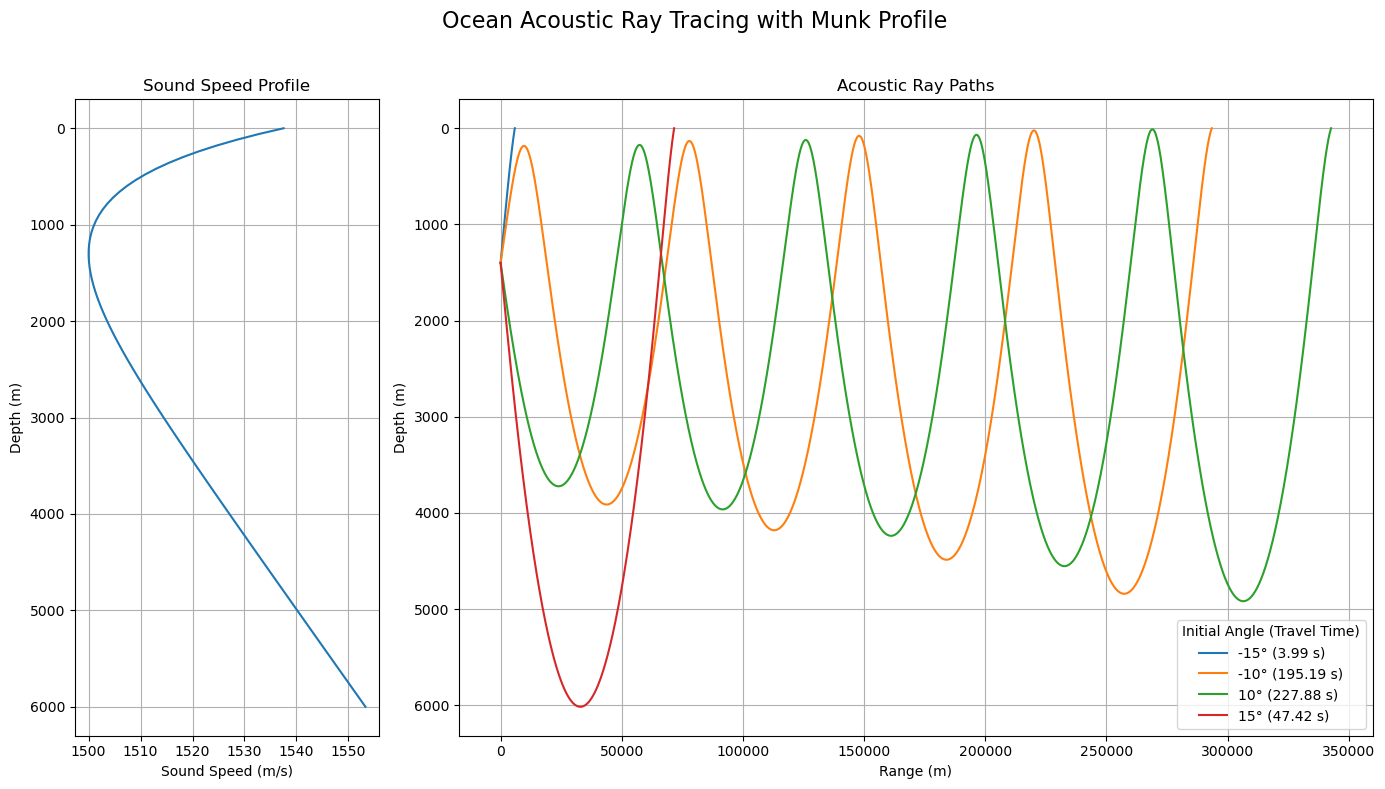

In [5]:
# Low-angle SoFAR tests for fun.  This will be using the Theoretical Munk model
initial_depth = 1400  # meters
max_range = 50e3    # meters (lateral distance)
angles = [-15, -10, 10, 15] # degrees

# --- Run Simulated version with Munk model ---
ray_paths = {}
print("Calculating travel times to the surface...")
for angle in angles:
    # If zProfile and cProfile are not provided program defaults to the Munk model
    ranges, depths, travel_time = RayTrace(angle, max_range, initial_depth)
    ray_paths[angle] = ((ranges, depths), travel_time)
    if travel_time is not None:
        surface_range = ranges[-1]
        print(f"  Angle: {angle:}° -> Reached surface at {surface_range:.2f} m. Travel Time: {travel_time:.5f} seconds.")
    else:
        print(f"  Angle: {angle:}° -> Did not reach the surface within {max_range} km.")

# --- Plotting ---
depth_grid = np.linspace(0, 6000, 101)  # linearly spaced points across depth for plotting sound speed profile
plotProfileRaypaths(ray_paths, sspDepths=depth_grid)